#### Предсказываем цену автомобиля

В папке лежит датасет Car details v3, в котором содержатся сведения об автомобилях, их характеристики и цены. Обучите модель линейной регрессии, которая будет предсказывать цену автомобиля по его характеристикам. 

Придется хорошенько поработать с характеристиками: это *творческая* часть задания. Во-первых, надо привести их в машиночитаемый вид, а во-вторых, можно посмотреть, как они коррелируют друг с другом и не нужно ли кого-то из них дропнуть или наоборот. 

*Примечание*: без работы над фичами за все дз - **0 баллов**. 

In [241]:
import pandas as pd

In [242]:
data = pd.read_csv('Car details v3.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [243]:
data.value_counts('seats')

seats
5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
dtype: int64

In [244]:
data.drop('name', axis=1, inplace=True)
data.drop('torque', axis=1, inplace=True)

In [256]:
data.drop('fuel_Petrol', axis=1, inplace=True)


In [257]:
data.drop('seller_type_Individual', axis=1, inplace=True)

In [258]:
data.drop('seller_type_Trustmark Dealer', axis=1, inplace=True)

In [259]:
data.drop('mileage', axis=1, inplace=True)

C:\Users\пк\AppData\Local\Temp\ipykernel_10828\1519879385.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

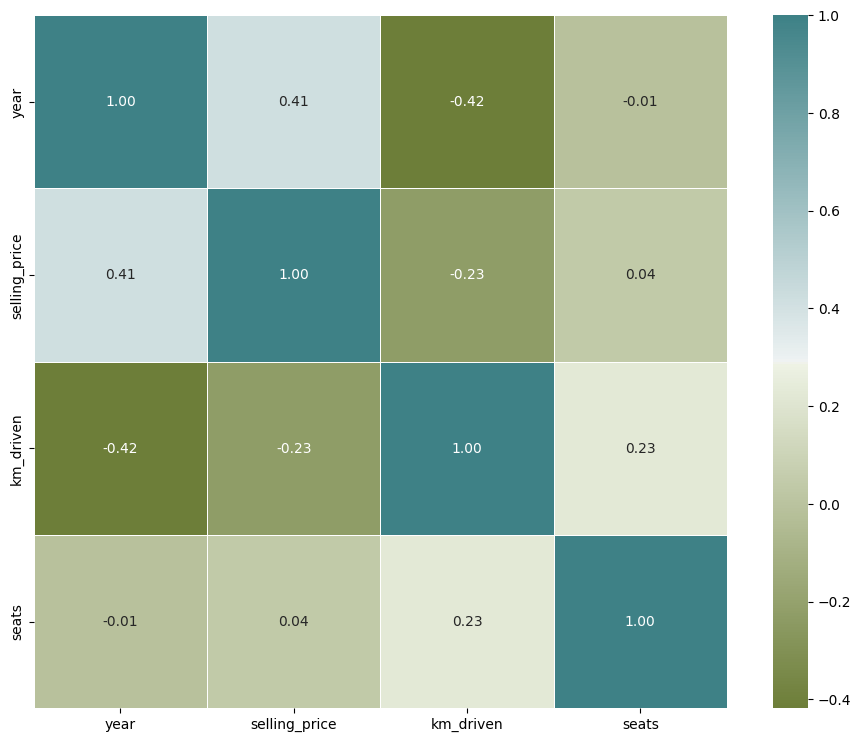

In [245]:
import seaborn as sns
from matplotlib import pylab as plt
plt.figure(figsize=(12, 9))

import numpy as np



corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [246]:
data['owner'] = data.apply(lambda x : 1 if x['owner'] == 'First Owner' else x['owner'], axis = 1)
data['owner'] = data.apply(lambda x : 2 if x['owner'] == 'Second Owner'  else x['owner'], axis = 1) 
data['owner'] = data.apply(lambda x : 3 if x['owner'] == 'Third Owner'  else x['owner'], axis = 1) 
data['owner'] = data.apply(lambda x : 4 if x['owner'] == 'Fourth & Above Owner'  else x['owner'], axis = 1) 
data['owner'] = data.apply(lambda x : 5 if x['owner'] == 'Test Drive Car'  else x['owner'], axis = 1) 


#корявая очень лямбда, возможно стоило просто функцию какую-нибудь написать...

In [247]:
data[["owner"]].value_counts()

owner
1        5289
2        2105
3         555
4         174
5           5
dtype: int64

In [248]:
data["mileage"] = data["mileage"].replace(r"[^\d\.]", "", regex=True)
data["engine"] = data["engine"].replace(r"[^\d\.]", "", regex=True)
data["max_power"] = data["max_power"].replace(r"[^\d\.]", "", regex=True)
#тут я убираю все кроме циферок и точек (для сотых)

In [249]:
data['transmission'] = data.apply(lambda x : 0 if x['transmission'] == 'Manual' else x['transmission'] , axis = 1) 
data['transmission'] = data.apply(lambda x : 1 if x['transmission'] == 'Automatic' else x['transmission'], axis = 1) 


In [250]:
data = pd.get_dummies(data, columns=['fuel', 'seller_type'], drop_first = True)

In [251]:
data['engine'] = pd.to_numeric(data['engine'])# выяснила, что после регулярок циыерки не int или float, а objects решила исправить

In [252]:
data['mileage'] = pd.to_numeric(data['mileage'])
data['max_power'] = pd.to_numeric(data['max_power'])

In [253]:
data = data.dropna()

In [254]:
data.head()
#вот вроде перевела все в циферки

,year,selling_price,km_driven,transmission,owner,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer
0,2014,450000,145500,0,1,23.40,1248.0,74.00,5.0,1,0,0,1,0
1,2014,370000,120000,0,2,21.14,1498.0,103.52,5.0,1,0,0,1,0
2,2006,158000,140000,0,3,17.70,1497.0,78.00,5.0,0,0,1,1,0
3,2010,225000,127000,0,1,23.00,1396.0,90.00,5.0,1,0,0,1,0
4,2007,130000,120000,0,1,16.10,1298.0,88.20,5.0,0,0,1,1,0


In [255]:
from sklearn.model_selection import train_test_split

X = data[['year','km_driven','transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats', 'fuel_Diesel', 'fuel_LPG', 'seller_type_Trustmark Dealer']] # матрица объект-признак. Обычно признаков > 1
y = data['selling_price']


In [218]:
data.dtypes

year                              int64
selling_price                     int64
km_driven                         int64
transmission                      int64
owner                             int64
mileage                         float64
engine                          float64
max_power                       float64
seats                           float64
fuel_Diesel                       uint8
fuel_LPG                          uint8
seller_type_Trustmark Dealer      uint8
dtype: object

In [219]:
X.shape

(7906, 11)

In [220]:
import numpy as np

In [221]:
data.isna().sum()

year                            0
selling_price                   0
km_driven                       0
transmission                    0
owner                           0
mileage                         0
engine                          0
max_power                       0
seats                           0
fuel_Diesel                     0
fuel_LPG                        0
seller_type_Trustmark Dealer    0
dtype: int64

year


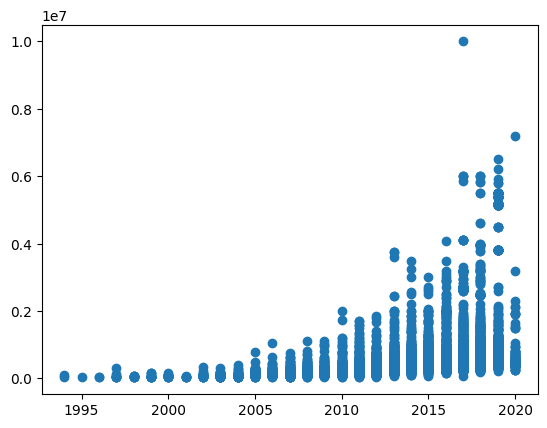

km_driven


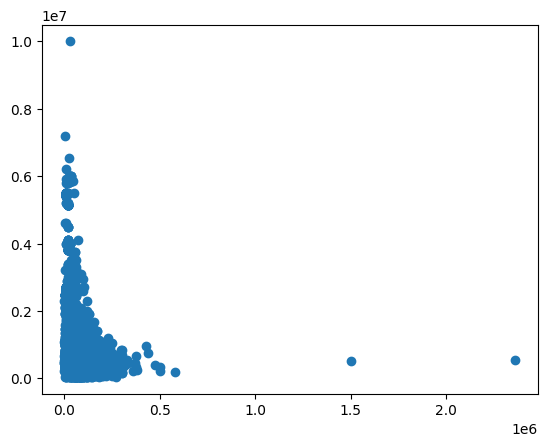

transmission


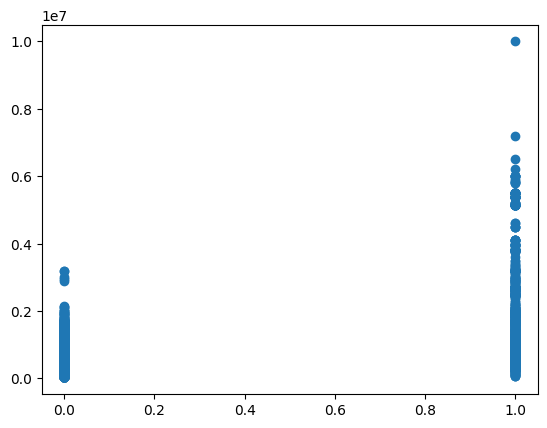

owner


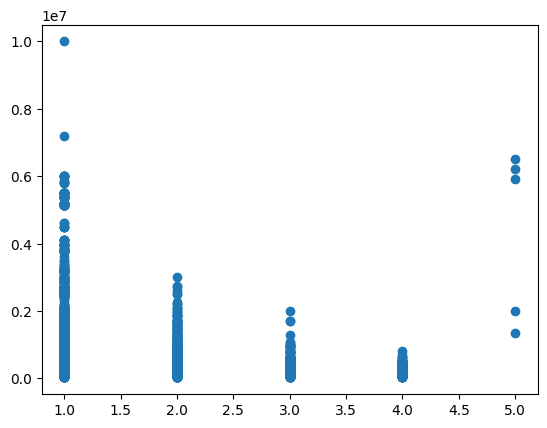

mileage


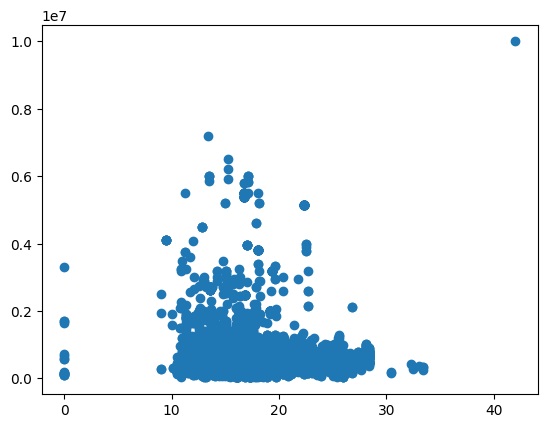

engine


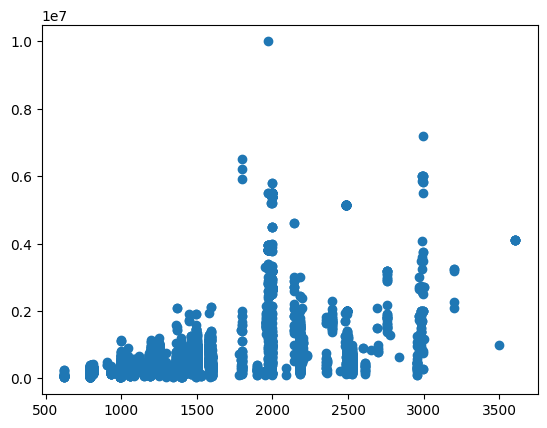

max_power


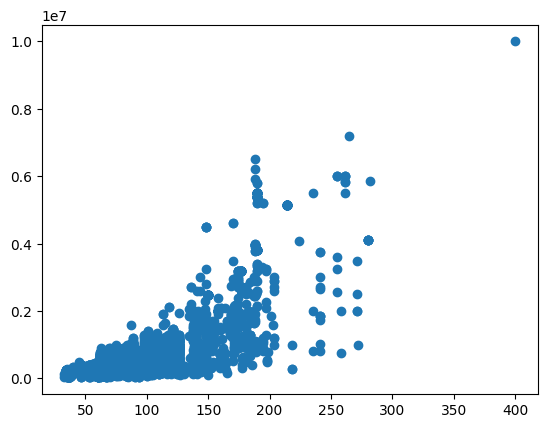

fuel_Diesel


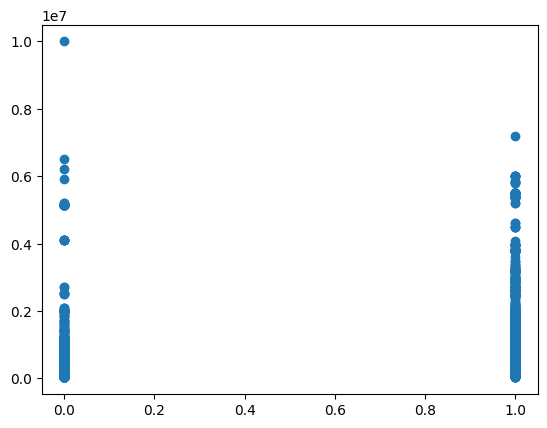

fuel_LPG


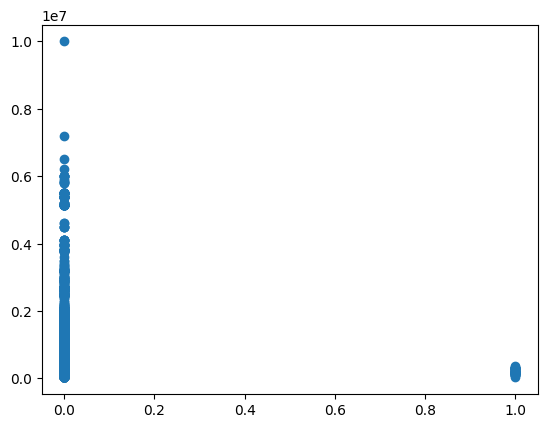

seller_type_Trustmark Dealer


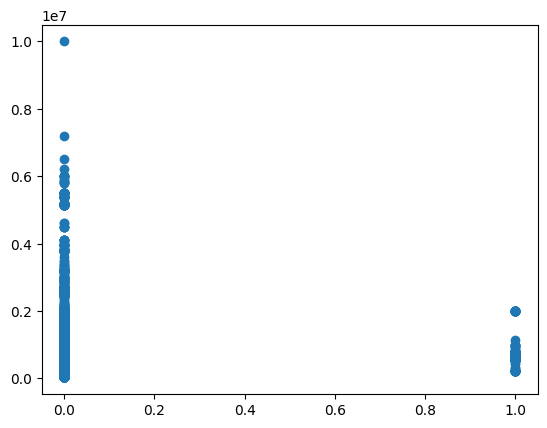

In [143]:
from matplotlib import pyplot as plt
for c in data.columns:
    if c != 'selling_price':
        print(c)
        plt.scatter(data[c], data['selling_price'])
        plt.show()
#посмотрела графики, решила не менять ничего здесь

In [90]:
#y = data['selling_price']
#X = data[['year', 'km_driven', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'fuel_Diesel', 'fuel_LPG', 'seller_type_Individual', 'seller_type_Trustmark Dealer']] # матрица объект-признак. Обычно признаков > 1

In [260]:
from sklearn.model_selection import train_test_split

y = data['selling_price']
X = data.drop('selling_price', axis=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [261]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(Xtrain, ytrain)

LinearRegression()

In [262]:
pred_test = model.predict(Xtest)
pred_train = model.predict(Xtrain)

print(mean_squared_error(pred_train, ytrain) ** 0.5, mean_squared_error(pred_test, ytest) ** 0.5)
#мне кажется большая ошибка из-за того, что разброс цен большой(были и оочень дорогие), но ошибка кажется какой-то слишком большой...


461493.864966017 498940.87109248247


In [264]:
#это добавила из новой темы, захотелось просто посмотреть...

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#масштабирование
X = data.drop('selling_price', axis=1)

y = data['selling_price']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)




print(r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test))


coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
print(f'коэффициенты{coefficients}')


#лассо
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2) ** 0.5)
print(regressor2.coef_,'\n')



#при разных значениях а:
for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')



from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.01, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

print(f'какой альфа победил:{lasso_cv.alpha_}')



#качество валидации
from sklearn.model_selection import cross_val_score
model = LinearRegression()
print(cross_val_score(model, X, y, cv = 3, scoring = 'r2').mean())



#обучили с параметром регуляризации а
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))


0.6620437652836445 0.6872475159986662
коэффициенты              0              0
0          year  157454.456476
1     km_driven  -59460.363634
2  transmission  170798.645867
3         owner   -7036.602215
4        engine   15626.437347
5     max_power  456883.315853
6         seats  -51374.225228
7   fuel_Diesel   51568.158267
8      fuel_LPG   18307.075633
Scores: 0.6872454626948084 464963.33112763485
[157450.59764002 -59451.08996999 170794.89920043  -7030.33638285
  15600.14654647 456894.5731965  -51348.4517639   51555.53853035
  18295.28673911] 

alpha=0.1
Scores: 0.6872474958492794 216189493879.66418
[157454.41498147 -59460.26885331 170798.61142237  -7036.53980541
  15626.15276215 456883.43862868 -51373.95870311  51568.03639175
  18306.95753079] 

alpha=25.1
Scores: 0.68724244780012 216192983332.75674
[157444.06780074 -59436.59237706 170789.97282811  -7020.9352022
  15555.20401414 456914.03964578 -51307.40760777  51537.52816092
  18277.43384933] 

alpha=50.1
Scores: 0.6872374077476